# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных

700 good and 300 bad credits with 20 predictor variables

In [2]:
column_names = [
    "status",  # status of the debtor's checking account with the bank (categorical)
    "duration",  # credit duration in months (quantitative)
    "credit_history",  # history of compliance with previous or concurrent credit contracts (categorical)
    "purpose",  # purpose for which the credit is needed (categorical)
    "amount",   # credit amount in DM (quantitative; result of monotonic transformation; 
                # actual data and type of transformation unknown)
    "savings",  # debtor's savings (categorical)
    "employment_duration",  # duration of debtor's employment with current employer 
                            # (ordinal; discretized quantitative)
    "installment_rate",  # credit installments as a percentage of debtor's disposable income 
                         # (ordinal; discretized quantitative)
    "personal_status_sex",  # combined information on sex and marital status; categorical; 
                            # sex cannot be recovered from the variable, because male singles 
                            # and female non-singles are coded with the same code (2); 
                            # female widows cannot be easily classified, because the code 
                            # table does not list them in any of the female categories
    "other_debtors",  # Is there another debtor or a guarantor for the credit? (categorical)
    "present_residence",  # length of time (in years) the debtor lives in the present residence 
                          # (ordinal; discretized quantitative)
    "property",  # the debtor's most valuable property, i.e. the highest possible code is used. 
                 # Code 2 is used, if codes 3 or 4 are not applicable and there is a car or any 
                 # other relevant property that does not fall under variable sparkont. (ordinal)
    "age",  # age in years (quantitative)
    "other_installment_plans",  # installment plans from providers other than the credit-giving bank (categorical)
    "housing",  # type of housing the debtor lives in (categorical)
    "number_credits",  # number of credits including the current one the debtor has (or had) at this bank 
                       # (ordinal, discretized quantitative); 
                       # contrary to Fahrmeir and HamerleÃ¢â‚¬â„¢s (1984) statement, the original data values are not available.
    "job",  # quality of debtor's job (ordinal)
    "people_liable",  # number of persons who financially depend on the debtor 
                      # (i.e., are entitled to maintenance) (binary, discretized quantitative)
    "telephone",  # Is there a telephone landline registered on the debtor's name? 
                  # (binary; remember that the data are from the 1970s)
    "foreign_worker",  # Is the debtor a foreign worker? (binary)
    "credit_risk",  # Has the credit contract been complied with (good) or not (bad) ? (binary)
]

cat_features = [
    "status",  # status of the debtor's checking account with the bank (categorical)
    "credit_history",  # history of compliance with previous or concurrent credit contracts (categorical)
    "purpose",  # purpose for which the credit is needed (categorical)
    "savings",  # debtor's savings (categorical)
    "personal_status_sex",  # combined information on sex and marital status; categorical; 
                            # sex cannot be recovered from the variable, because male singles 
                            # and female non-singles are coded with the same code (2); 
                            # female widows cannot be easily classified, because the code 
                            # table does not list them in any of the female categories
    "other_debtors",  # Is there another debtor or a guarantor for the credit? (categorical)
    "other_installment_plans",  # installment plans from providers other than the credit-giving bank (categorical)
    "housing",  # type of housing the debtor lives in (categorical)
]

quant_features = [    
    "duration",  # credit duration in months (quantitative)
    "amount",   # credit amount in DM (quantitative; result of monotonic transformation; 
                # actual data and type of transformation unknown)
    "employment_duration",  # duration of debtor's employment with current employer 
                            # (ordinal; discretized quantitative)
    "installment_rate",  # credit installments as a percentage of debtor's disposable income 
                         # (ordinal; discretized quantitative)
    "present_residence",  # length of time (in years) the debtor lives in the present residence 
                          # (ordinal; discretized quantitative)
    "property",  # the debtor's most valuable property, i.e. the highest possible code is used. 
                 # Code 2 is used, if codes 3 or 4 are not applicable and there is a car or any 
                 # other relevant property that does not fall under variable sparkont. (ordinal)
    "age",  # age in years (quantitative)
    "number_credits",  # number of credits including the current one the debtor has (or had) at this bank 
                       # (ordinal, discretized quantitative); 
    "job",  # quality of debtor's job (ordinal)
]

binary_features = [
    "people_liable",  # number of persons who financially depend on the debtor 
                      # (i.e., are entitled to maintenance) (binary, discretized quantitative)    
    "telephone",  # Is there a telephone landline registered on the debtor's name? 
                  # (binary; remember that the data are from the 1970s)
    "foreign_worker",  # Is the debtor a foreign worker? (binary)
]

target = [
    "credit_risk",  # Has the credit contract been complied with (good) or not (bad) ? (binary)
]

In [3]:
df = pd.read_csv("./data/SouthGermanCredit.asc", delimiter=" ", header=0, names=column_names)
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


# Анализ данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

Согласно описанию датасета, часть признаков является категориальными, часть количественными, а часть бинарными.
Тем не менее мы видим, что абсолютно все колонки имеют целочисленные значения. Пропусков нет.

Посмотрим на графики

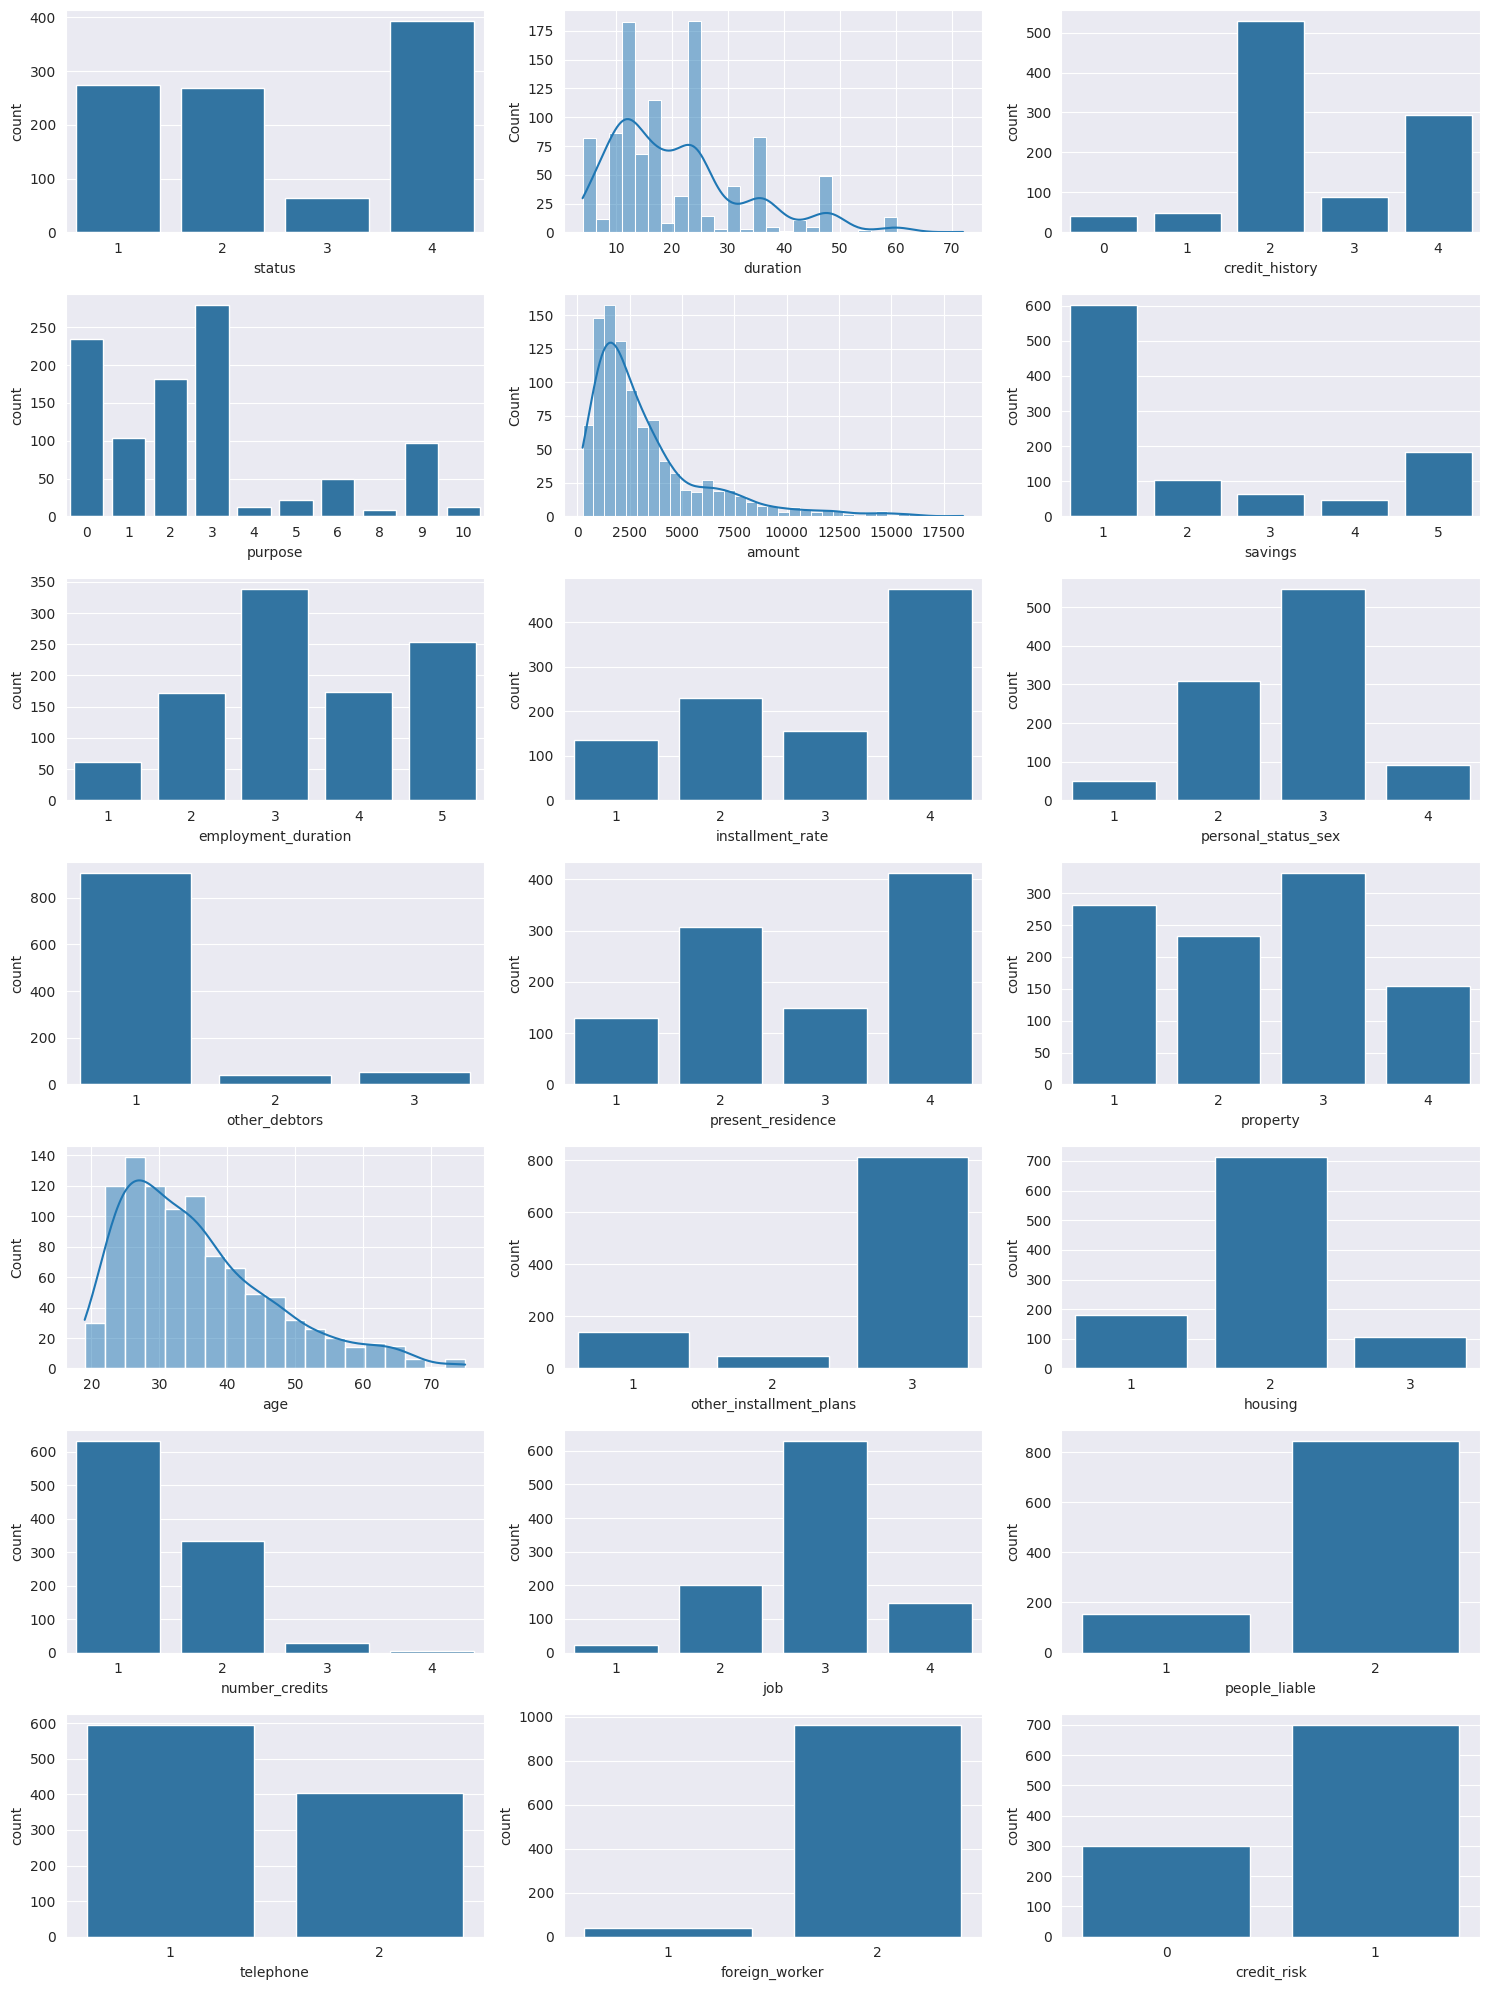

In [5]:
n_rows = 7
n_cols = 3
_, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))

for idx, feature in enumerate(column_names):
    row = idx // n_cols
    col = idx % n_cols
    if feature in ["duration", "amount", "age"]:
        sns.histplot(data=df, x=feature, ax=axes[row, col], kde=True)
    else:
        sns.countplot(data=df, x=feature, ax=axes[row, col])

plt.tight_layout()
plt.show()

Каких-то аномалий на графиках я не вижу: таргет не имеет значительного дисбаланса (300/700).
Несколько похожим выглядит распределение признаков "installment_rate" и "present_residence", 
но принимая во внимание значение этих признаков, совпадение скорее всего случайно.
`installment_rate` - рассрочка по кредиту в процентах от располагаемого дохода должника 
`present_residence` - продолжительность (в годах) проживания должника по данному месту жительства

Тем не менее построим корреляционную матрицу для проверки наличия корреляции между признаками 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 [Text(0.5, 0, 'status'),
  Text(1.5, 0, 'duration'),
  Text(2.5, 0, 'credit_history'),
  Text(3.5, 0, 'purpose'),
  Text(4.5, 0, 'amount'),
  Text(5.5, 0, 'savings'),
  Text(6.5, 0, 'employment_duration'),
  Text(7.5, 0, 'installment_rate'),
  Text(8.5, 0, 'personal_status_sex'),
  Text(9.5, 0, 'other_debtors'),
  Text(10.5, 0, 'present_residence'),
  Text(11.5, 0, 'property'),
  Text(12.5, 0, 'age'),
  Text(13.5, 0, 'other_installment_plans'),
  Text(14.5, 0, 'housing'),
  Text(15.5, 0, 'number_credits'),
  Text(16.5, 0, 'job'),
  Text(17.5, 0, 'people_liable'),
  Text(18.5, 0, 'telephone'),
  Text(19.5, 0, 'foreign_worker'),
  Text(20.5, 0, 'credit_risk')])

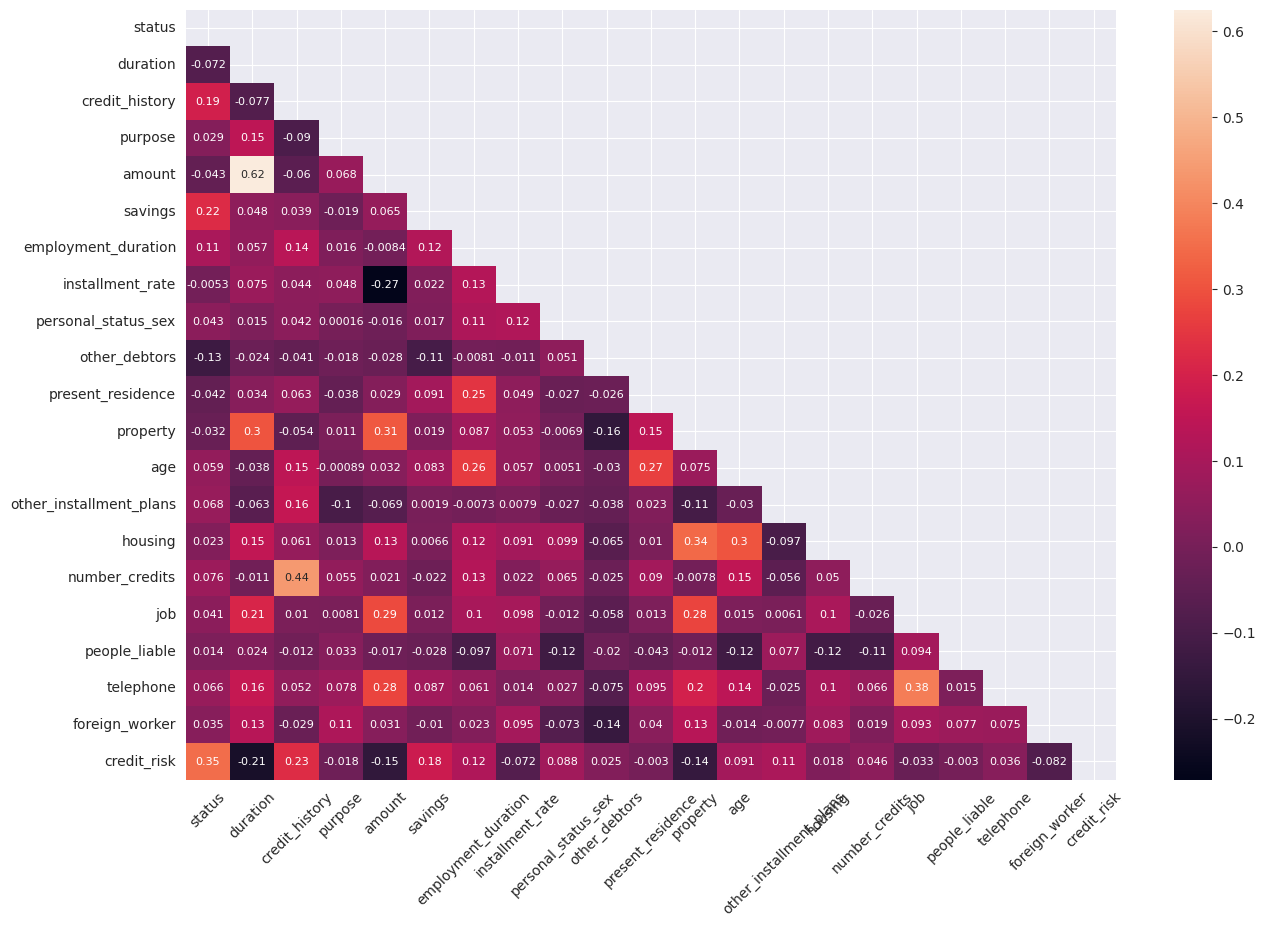

In [6]:
corr_matrix = df.corr()
mask = np.triu(corr_matrix)

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, annot_kws={"fontsize":8})
plt.xticks(rotation=45)

Видим средне выраженную корреляцию между `amount` (сумма кредита в ДМ) 
и `duration` (срок кредита в месяцах), что, в принципе, логично - 
чем больше кредит, тем дольше планируется его выплачивать

# PCA

## Понижение размерности

Строго говоря, поскольку:
- часть признаков являются категориальными
- некоторые признаки являются бинарными
- одним из признаков фактически является таргет,

следовало бы применить такую последовательность действий:
1) перекодировать категориальные признаки при помощи OneHotEncoder
2) перевести бинарные признаки в 0 и 1
3) исключить из рассмотрения таргет
4) после этого выполнять дальнейшие преобразования:
    - скалирование;
    - понижение размерности.

По факту мы имеем: 
- датасет полностью состоящий из целочисленных значений (будем считать это результатом `LabelEncoder`) :)
- бинарные признаки в нем - это не True и False и даже не 0 и 1, а 1 и 2
- у нас нет задачи тренировки модели по известному таргету

Поэтому перейдем сразу к преобразованиям из п. 4

Поскольку наши признаки имеют различную размерность, сначала требуется привести все значения к диапазону [0; 1].
Используем для этой цели MinMaxScaler. После этого понизим размерность матрицы признаков с помощью PCA.

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# # step-by-step flow
# scaler = MinMaxScaler()
# df_rescaled = scaler.fit_transform(df)
# pca = PCA(random_state=42) 
# pca.fit(df_rescaled)

# pipeline flow
pipe = make_pipeline(MinMaxScaler(), PCA(random_state=42))
pca = pipe["pca"]
pipe.fit(df)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('pca', PCA(random_state=42))])

## Построение графика

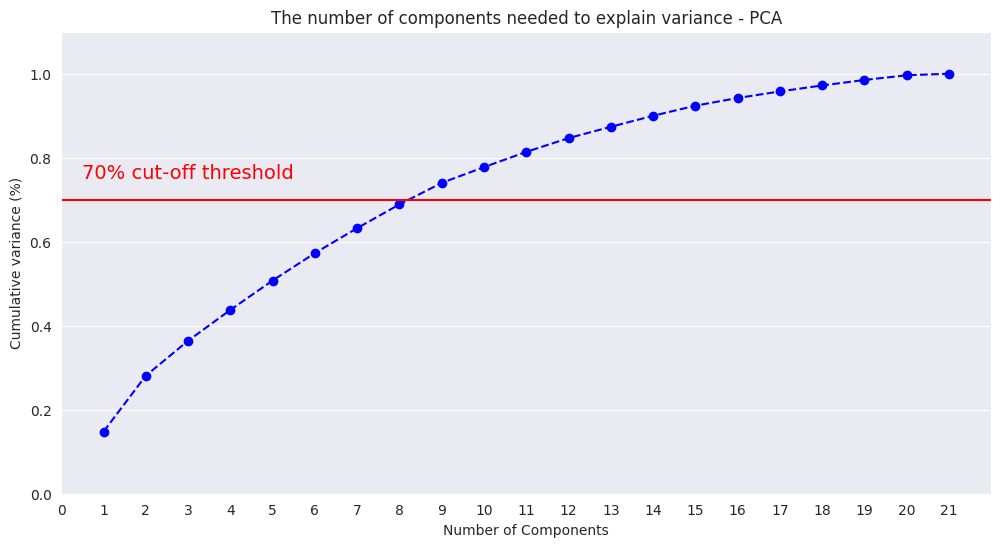

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
x = np.arange(1, 22, step=1)
y = pca.explained_variance_ratio_.cumsum()

plt.ylim(0.0,1.1)
plt.plot(x, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 22, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance - PCA')

plt.axhline(y=0.7, color='r', linestyle='-')
plt.text(0.5, 0.75, '70% cut-off threshold', color = 'red', fontsize=14)

ax.grid(axis='x')
plt.show()

Количество признаков, необходимое для того, чтобы объяснить 70 и выше процентов дисперсии - 
это точка пересечения графика с горизонтальной линией 70%. Эта точка находится между 8 и 9 признаками. 
Таким образом, если мы хотим добиться того, чтобы при понижении размерности терялось 
не более 30% информации, нам следует кодировать с использованием 9 признаков (фич). 

Попробуем теперь для понижения размерности применить класс TruncatedSVD. 
В отличие от PCA он не центрирует значения перед преобразованием, 
но использует тот же алгоритм (SVD)

# TruncatedSVD

## Понижение размерности

In [9]:
from sklearn.decomposition import TruncatedSVD

pipe = make_pipeline(MinMaxScaler(), TruncatedSVD(n_components=21, random_state=42))

tsvd = pipe["truncatedsvd"]
pipe.fit(df)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('truncatedsvd',
                 TruncatedSVD(n_components=21, random_state=42))])

## Построение графика

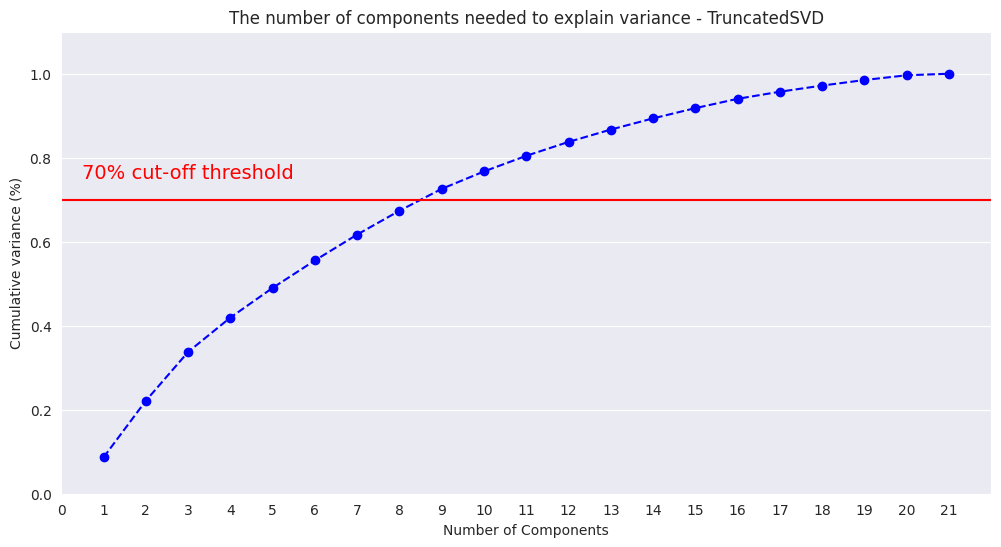

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
x = np.arange(1, 22, step=1)
y = tsvd.explained_variance_ratio_.cumsum()

plt.ylim(0.0,1.1)
plt.plot(x, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 22, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance - TruncatedSVD')

plt.axhline(y=0.7, color='r', linestyle='-')
plt.text(0.5, 0.75, '70% cut-off threshold', color = 'red', fontsize=14)

ax.grid(axis='x')
plt.show()

Точка пересечения графика и горизонтальной линии 70% несколько сдвинулась, но также осталась между 8 и 9. 

# Вывод

Для того чтобы при понижении размерности терялось не более 30% информации, 
нам следует выполнять преобразование с использованием 9 признаков (фич).

Этого можно добиться используя параметр `n_components=0.7`

PCA(n_components=0.7)